Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = '/kaggle/input/finance-modeling/Data.csv'
finance = pd.read_csv(file_path,index_col=0)

In [3]:
finance

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,237056.39,...,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,...,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,...,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,...,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,...,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05
31.10.2019,15652952.20,0.00,0.00,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,...,763523.36,742787.97,558085.95,461806.22,358671.23,281881.11,241719.91,182730.05,144953.58,119260.10
30.11.2019,15107713.30,0.00,0.00,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,...,930720.35,697500.94,667277.73,547749.09,387987.02,309448.86,283876.04,215635.85,185516.45,141560.57
31.12.2019,17004745.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,...,1245452.39,1116505.94,803590.21,724956.28,545397.33,458832.95,393971.01,333818.53,286831.44,216447.57
31.01.2020,16794379.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,...,1505493.21,1182983.95,955821.48,846061.73,683116.81,560572.44,468203.76,349067.92,309854.99,267813.78
29.02.2020,19217205.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6142911.08,1833677.81,1317065.75,1108494.37,918465.33,719913.69,587381.96,498801.31,371563.77,294941.22


Setting parameters

In [4]:
n_forecast = 30 # period of forecast(30 month)
n_vintage = len(finance)   # number of vintage
discount_rate = 0.025

extracting the historical cash flow and origination amount

In [5]:
historical_cf = finance.iloc[:, 1:].values
origination_amount = finance.iloc[:, 0].values

calculating the remaining period of forecast

In [6]:
periods_remaining = n_forecast - np.arange(n_vintage,0,-1)
periods_remaining 

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

calculating repayment rates

In [7]:
repayment_rates = historical_cf / origination_amount[:, np.newaxis]
repayment_rates

array([[0.14403689, 0.33259654, 0.13256537, 0.09263492, 0.07350404,
        0.0538394 , 0.04267579, 0.03238522, 0.02366128, 0.01680496,
        0.01164664, 0.00925262, 0.0063281 , 0.00531655, 0.00370517,
        0.00297314, 0.0024479 , 0.00180521, 0.001655  , 0.00114216],
       [0.        , 0.12814713, 0.27712365, 0.11389635, 0.08933524,
        0.08210533, 0.06153328, 0.04652144, 0.0386073 , 0.03029547,
        0.02348303, 0.01829472, 0.01490533, 0.01273989, 0.00849682,
        0.0073278 , 0.00583872, 0.00481892, 0.00399091, 0.00344162],
       [0.        , 0.        , 0.14325134, 0.27514012, 0.11256975,
        0.08192479, 0.06624011, 0.06132435, 0.04690406, 0.03941195,
        0.02818869, 0.02409672, 0.01786839, 0.01584019, 0.01188514,
        0.01027594, 0.00836289, 0.00603198, 0.00572101, 0.00468726],
       [0.        , 0.        , 0.        , 0.12880939, 0.32503422,
        0.11047895, 0.09934316, 0.07057191, 0.05528814, 0.04546834,
        0.0332218 , 0.02680893, 0.02018964, 0

setting 1st and 2nd period's repayment rates

In [8]:
first_period = np.diag(repayment_rates)
second_period = np.concatenate([np.diag(repayment_rates[:,1:]),np.array([repayment_rates[-1,-1] * 2])])
second_period

array([0.33259654, 0.27712365, 0.27514012, 0.32503422, 0.27097044,
       0.29913554, 0.30697575, 0.29096374, 0.27967156, 0.31965683,
       0.28798087, 0.2899633 , 0.34103862, 0.36413301, 0.31517458,
       0.32359027, 0.27293364, 0.31598691, 0.28062317, 0.28696874])

initializing forecast matrix

In [9]:
p = np.zeros((n_vintage, n_forecast))
p[:, 0] = first_period
p[:, 1] = second_period
p

array([[0.14403689, 0.33259654, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.12814713, 0.27712365, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.14325134, 0.27514012, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [10]:
for i in range(n_vintage):
    for j in range(2,n_forecast):
        p[i,j] = max(p[i,1] * np.log(1 + (1-np.sum(p[i,0:j])) * (1-(j/n_forecast))), 0 )

In [11]:
pd.DataFrame(p)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.144037,0.332597,0.132291,0.100298,0.074750,0.055056,0.040289,0.029431,0.021543,0.015846,...,0.000913,0.000731,0.000585,0.000467,0.000369,0.000287,0.000217,0.000156,0.000100,0.000049
1,0.128147,0.277124,0.122358,0.098176,0.077840,0.061164,0.047776,0.037205,0.028959,0.022576,...,0.001979,0.001618,0.001320,0.001070,0.000858,0.000676,0.000516,0.000373,0.000242,0.000119
2,0.143251,0.275140,0.119307,0.095718,0.075909,0.059680,0.046656,0.036371,0.028344,0.022125,...,0.001964,0.001607,0.001312,0.001064,0.000854,0.000673,0.000514,0.000371,0.000241,0.000118
3,0.128809,0.325034,0.133895,0.102570,0.077279,0.057544,0.042559,0.031404,0.023204,0.017215,...,0.001052,0.000845,0.000678,0.000542,0.000430,0.000335,0.000253,0.000182,0.000117,0.000057
4,0.137348,0.270970,0.119145,0.096024,0.076522,0.060464,0.047505,0.037215,0.029138,0.022846,...,0.002093,0.001716,0.001402,0.001139,0.000915,0.000722,0.000551,0.000399,0.000259,0.000127
5,0.146263,0.299136,0.124784,0.097825,0.075645,0.057916,0.044074,0.033457,0.025411,0.019355,...,0.001435,0.001164,0.000942,0.000759,0.000605,0.000474,0.000361,0.000260,0.000168,0.000082
6,0.143124,0.306976,0.127166,0.098974,0.075922,0.057635,0.043480,0.032723,0.024647,0.018624,...,0.001303,0.001053,0.000850,0.000683,0.000544,0.000426,0.000323,0.000232,0.000150,0.000074
7,0.141278,0.290964,0.123720,0.097825,0.076350,0.059021,0.045352,0.034755,0.026638,0.020465,...,0.001615,0.001313,0.001066,0.000861,0.000688,0.000540,0.000411,0.000297,0.000192,0.000094
8,0.148982,0.279672,0.119530,0.095424,0.075278,0.058863,0.045768,0.035490,0.027517,0.021377,...,0.001833,0.001497,0.001220,0.000989,0.000792,0.000624,0.000476,0.000344,0.000223,0.000109
9,0.147462,0.319657,0.129046,0.099100,0.074916,0.056012,0.041616,0.030858,0.022913,0.017083,...,0.001085,0.000873,0.000702,0.000562,0.000446,0.000348,0.000264,0.000189,0.000122,0.000060


extracting forecasted repayment rates for the remaining periods

In [12]:
p_forecast = np.zeros((n_vintage,n_forecast-1))
for i in range(n_vintage):
    for j in range(periods_remaining[i]):
        p_forecast[i,j] = p[i,n_forecast-periods_remaining[i]+j]
pd.DataFrame(p_forecast)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000913,0.000731,0.000585,0.000467,0.000369,0.000287,0.000217,0.000156,0.000100,0.000049,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002420,0.001979,0.001618,0.001320,0.001070,0.000858,0.000676,0.000516,0.000373,0.000242,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.002937,0.002400,0.001964,0.001607,0.001312,0.001064,0.000854,0.000673,0.000514,0.000371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002072,0.001646,0.001313,0.001052,0.000845,0.000678,0.000542,0.000430,0.000335,0.000253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004695,0.003820,0.003119,0.002553,0.002093,0.001716,0.001402,0.001139,0.000915,0.000722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.004277,0.003404,0.002725,0.002193,0.001772,0.001435,0.001164,0.000942,0.000759,0.000605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.005036,0.003961,0.003138,0.002501,0.002004,0.001613,0.001303,0.001053,0.000850,0.000683,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.007496,0.005923,0.004710,0.003767,0.003030,0.002449,0.001986,0.001615,0.001313,0.001066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.010277,0.008138,0.006482,0.005193,0.004183,0.003386,0.002752,0.002244,0.001833,0.001497,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.009676,0.007366,0.005653,0.004374,0.003411,0.002681,0.002121,0.001689,0.001352,0.001085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


calculating discount factors

In [13]:
discount_factors = 1/((1+discount_rate)**(np.arange(1,n_forecast)/12))
discount_factors

array([0.9979444 , 0.99589302, 0.99384586, 0.99180291, 0.98976416,
       0.9877296 , 0.98569922, 0.98367301, 0.98165097, 0.97963309,
       0.97761935, 0.97560976, 0.97360429, 0.97160295, 0.96960572,
       0.9676126 , 0.96562357, 0.96363863, 0.96165777, 0.95968099,
       0.95770827, 0.9557396 , 0.95377498, 0.9518144 , 0.94985784,
       0.94790531, 0.9459568 , 0.94401229, 0.94207177])

In [14]:
present_value = np.zeros((n_vintage,n_forecast-1))
for i in range(n_vintage):
    for j in range(periods_remaining[i]):
        present_value[i,j] = p[i,n_forecast-periods_remaining[i]+j] * discount_factors[j] * origination_amount[i]
pd.DataFrame(present_value)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,9.130098e+03,7.294323e+03,5.826881e+03,4.637993e+03,3.660122e+03,2.841820e+03,2.143298e+03,1533.195570,986.193384,481.210789,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.624458e+04,2.141792e+04,1.747726e+04,1.422592e+04,1.151148e+04,9.214739e+03,7.241477e+03,5516.169881,3977.240809,2573.373323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.145634e+04,2.565069e+04,2.095003e+04,1.710782e+04,1.393420e+04,1.128183e+04,9.035374e+03,7103.500970,5412.943183,3903.886056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.597375e+04,2.058074e+04,1.639371e+04,1.310906e+04,1.050368e+04,8.412210e+03,6.710940e+03,5306.331607,4126.778942,3116.640720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6.796547e+04,5.517505e+04,4.495828e+04,3.673333e+04,3.005533e+04,2.458254e+04,2.005079e+04,16254.408187,13031.863134,10254.885384,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6.681150e+04,5.306565e+04,4.239658e+04,3.404571e+04,2.745083e+04,2.219303e+04,1.795806e+04,14508.504687,11663.422462,9283.582223,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7.592029e+04,5.959965e+04,4.710971e+04,3.747183e+04,2.996950e+04,2.407552e+04,1.939965e+04,15651.047895,12611.239833,10114.693633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.272080e+05,1.003040e+05,7.959324e+04,6.353922e+04,5.100093e+04,4.112938e+04,3.329038e+04,27007.882552,21922.360170,17760.393204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.722354e+05,1.361122e+05,1.081963e+05,8.650103e+04,6.953208e+04,5.616634e+04,4.555851e+04,37070.486818,30218.458133,24633.621486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.855678e+05,1.409677e+05,1.079626e+05,8.336393e+04,6.488507e+04,5.088535e+04,4.018415e+04,31927.922970,25495.924394,20433.640115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
present_value.sum(axis=1)

array([   38535.13543062,   120660.77032326,   149600.82000229,
         118603.8901984 ,   337970.2202069 ,   319911.55724037,
         357673.05730244,   613820.70000524,   844303.81811114,
         818352.81651003,  1662847.69349423,  2071672.88504096,
        1731343.25939521,  2198961.98866009,  4472572.579986  ,
        5787385.11970769,  8960399.46400467, 11376120.1677811 ,
       16604313.87972406, 25584322.99765987])

total portfolio valuation

In [16]:
round(present_value.sum(),2)

84169372.82

In [17]:
col_label = pd.to_datetime(finance.columns[1:],format='%d.%m.%Y')
last_date = col_label.max()
new_dates = pd.date_range(start=last_date+pd.DateOffset(1), end='31.05.2023',freq='M')
new_dates_labels = new_dates.strftime('%d.%m.%Y').to_list()
new_dates_labels

['31.01.2021',
 '28.02.2021',
 '31.03.2021',
 '30.04.2021',
 '31.05.2021',
 '30.06.2021',
 '31.07.2021',
 '31.08.2021',
 '30.09.2021',
 '31.10.2021',
 '30.11.2021',
 '31.12.2021',
 '31.01.2022',
 '28.02.2022',
 '31.03.2022',
 '30.04.2022',
 '31.05.2022',
 '30.06.2022',
 '31.07.2022',
 '31.08.2022',
 '30.09.2022',
 '31.10.2022',
 '30.11.2022',
 '31.12.2022',
 '31.01.2023',
 '28.02.2023',
 '31.03.2023',
 '30.04.2023',
 '31.05.2023']

visualizing expected cash flow over time

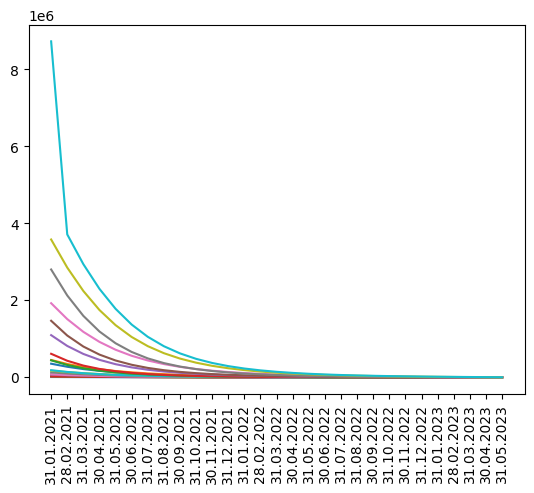

In [18]:
for i in range(n_vintage):
    sns.lineplot(x=new_dates_labels, y= present_value[i,:])
    plt.xticks(rotation=90)

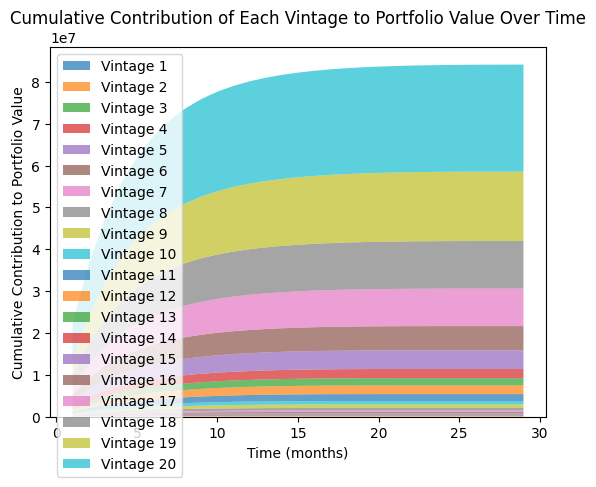

In [19]:

# Assuming 'present_value' is your numpy array containing the present values
# present_value has shape (n_vintage, n_forecast-1)

# Calculate cumulative contribution for each vintage
cumulative_contribution = np.cumsum(present_value, axis=1)

# Create a time axis from 1 to n_forecast-1
time_axis = range(1, n_forecast)

# Plot stacked area chart
plt.stackplot(time_axis, cumulative_contribution, labels=[f'Vintage {i+1}' for i in range(n_vintage)], alpha=0.7)

plt.title('Cumulative Contribution of Each Vintage to Portfolio Value Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Cumulative Contribution to Portfolio Value')
plt.legend(loc='upper left')